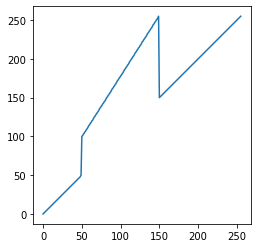

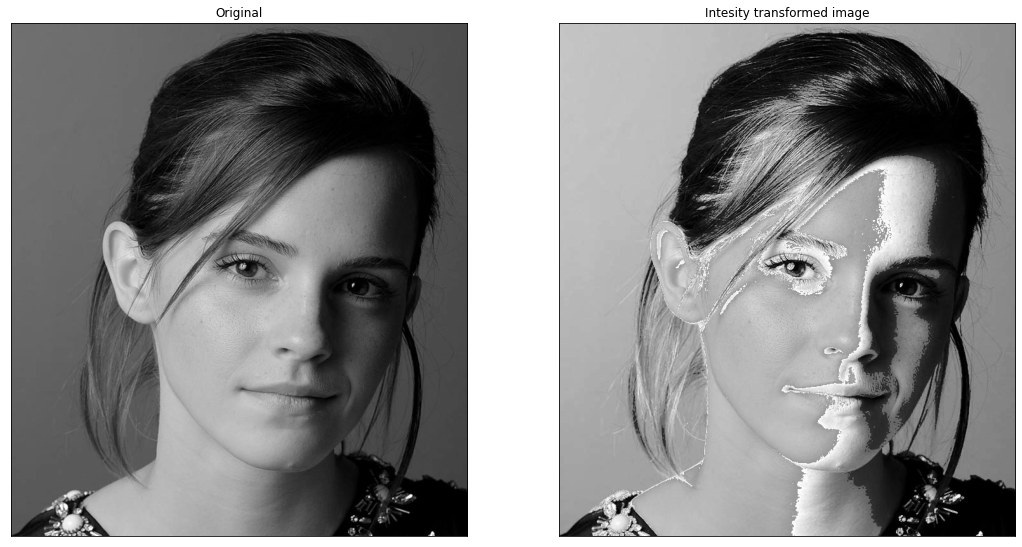

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert im is not None

t1= np.linspace (0,50,50)
t2= np.linspace (50,100,0)
t3= np.linspace (100,255, 100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)
assert len(t) ==256

result= cv.LUT(im,t)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Intesity transformed image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()


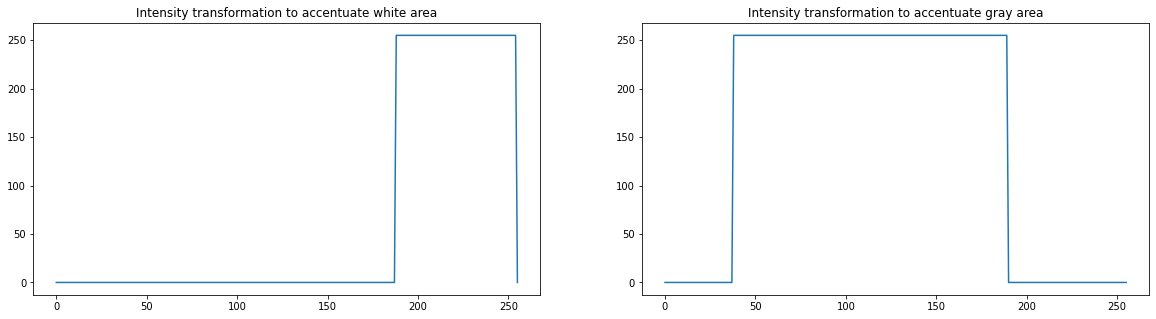

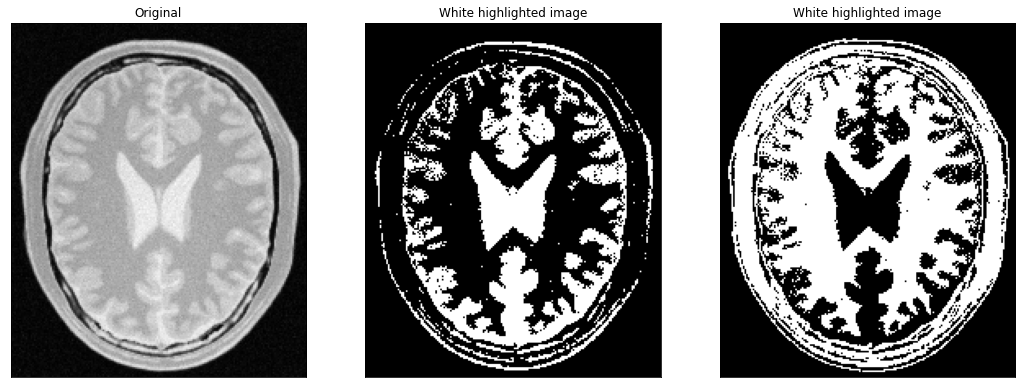

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

t1=np.linspace(0,0,188)
t2=np.linspace(255,256,68) #white and light gray both

t3=np.linspace(0,0,38)
t4=np.linspace(255,256,153)
t5=np.linspace(0,0,65)


t_gray=np.concatenate((t3,t4,t5), axis =0).astype(np.uint8)
t_white= np.concatenate((t1,t2), axis =0).astype(np.uint8)
fig,axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(t_white)
axs[0].set_title("Intensity transformation to accentuate white area")

axs[1].plot(t_gray)
axs[1].set_title("Intensity transformation to accentuate gray area")

assert len(t_white) ==256
assert len(t_gray) ==256

white_result= cv.LUT(im,t_white)
gray_result= cv.LUT(im,t_gray)

fig,axes = plt.subplots(1,3,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( white_result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "White highlighted image" )

axes [2] . imshow( gray_result , cmap= "gray",vmin=0, vmax=255)
axes [2] . set_title( "White highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

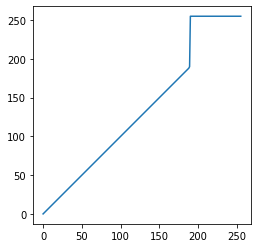

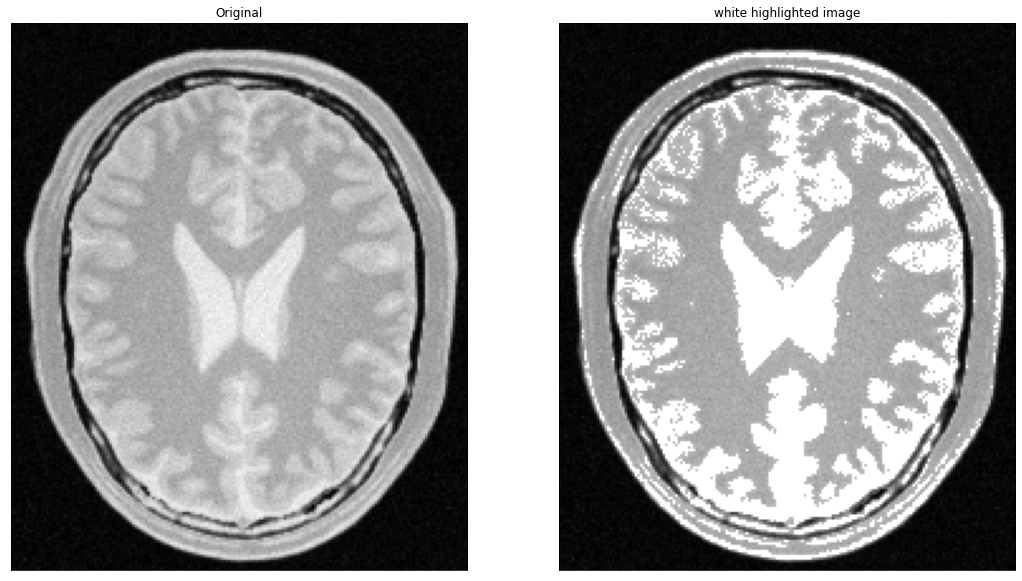

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

t1= np.linspace (0,190,190)
t2= np.linspace (188,255,0)
t3= np.linspace (255,255, 66)

t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)
assert len(t) ==256

result= cv.LUT(im,t)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "white highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

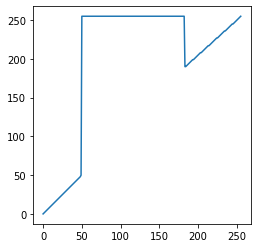

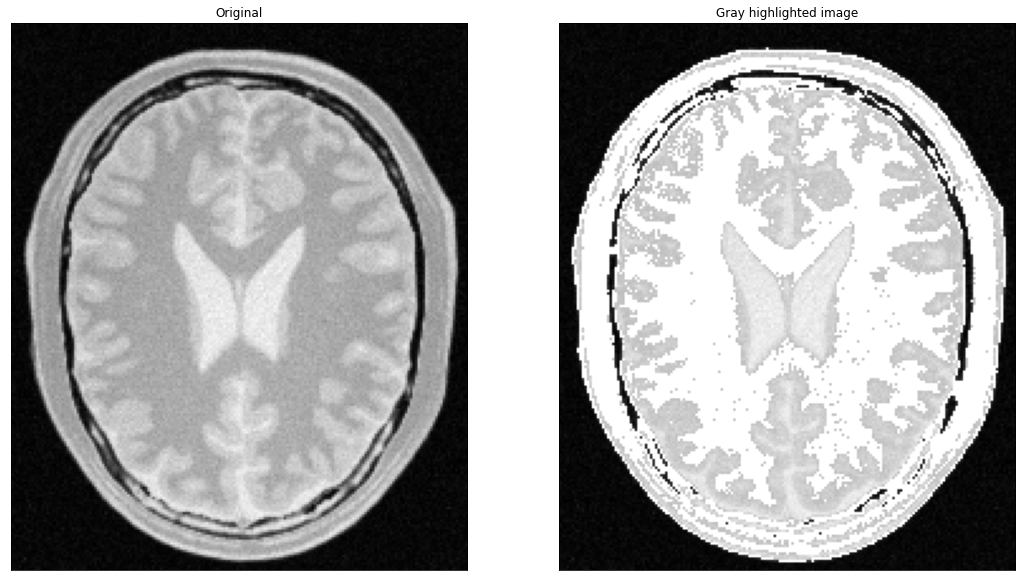

In [76]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

t1= np.linspace (0,50,50)
t2= np.linspace (50,255,0)
t3= np.linspace (255,255, 133)
t4=np.linspace(255,190,0)
t5=np.linspace(190,255,73)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)
assert len(t) ==256

result= cv.LUT(im,t)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Gray highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

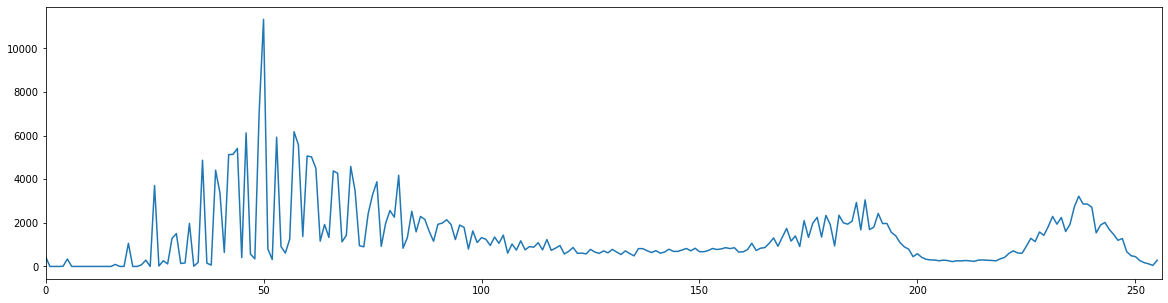

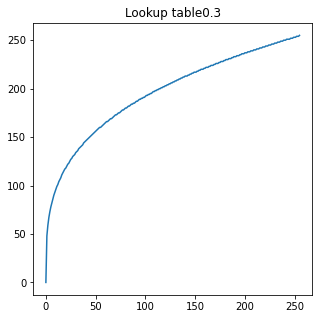

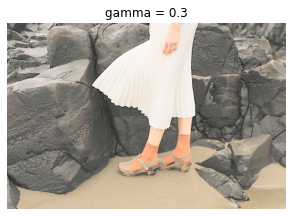

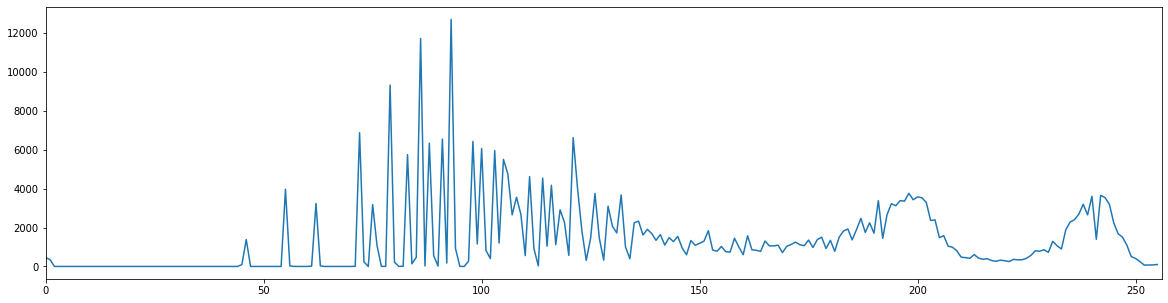

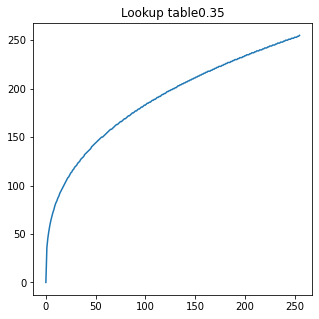

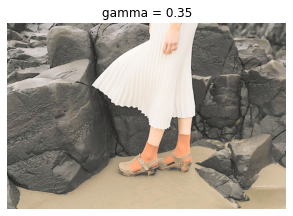

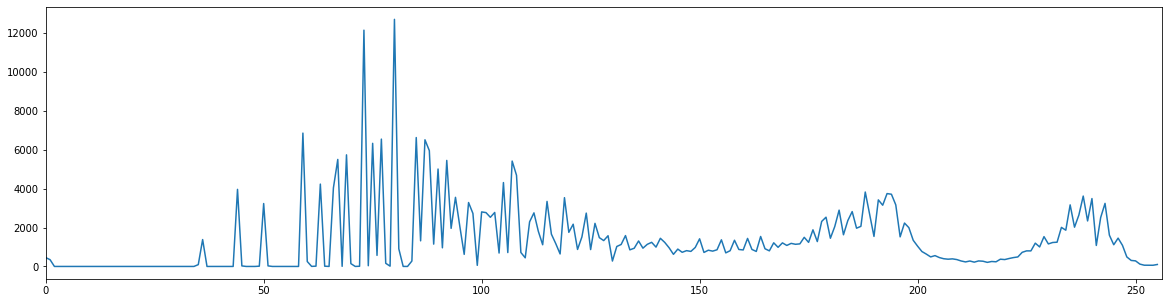

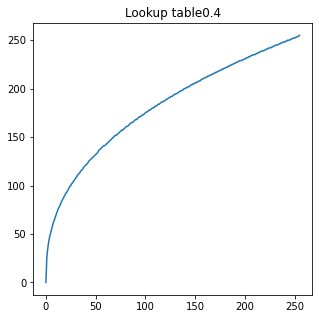

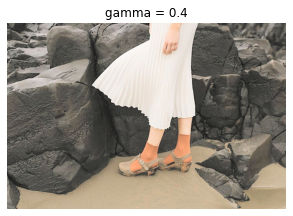

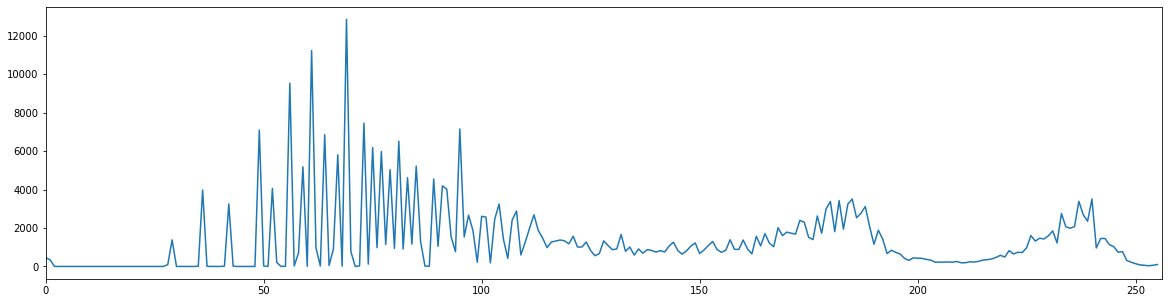

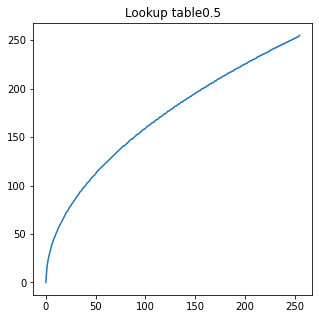

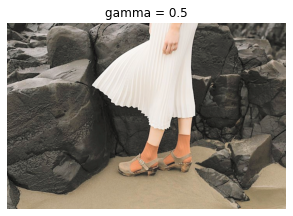

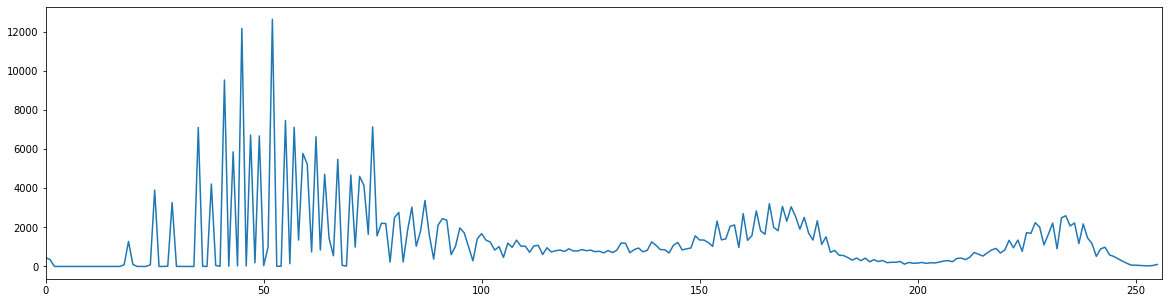

In [86]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'highlights_and_shadows.jpg')
assert im is not None
gr=cv.COLOR_BAYER_BG2GRAY
histr=cv.calcHist([g], [0], None, [256], [0,256])    
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(histr)
ax.set_xlim([0,256])
gamma = [0.3,0.35,0.4,0.5]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range (0,256)]).astype(np.uint8)
    GH=cv.cvtColor(im,cv.COLOR_BGR2LAB) 
    
    (L, a, b) = cv.split(GH)
    g1=cv.LUT(L,t)

    gamma_corrected = cv.merge([g1,a,b])
    g=cv.cvtColor(gamma_corrected,cv.COLOR_Lab2RGB)
    
    gray = cv.cvtColor(g,cv.COLOR_RGB2GRAY) 
    histr=cv.calcHist([gray], [0], None, [256], [0,256])

    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(t)
    ax . set_title( "Lookup table"+ str(i) )

    fig,ax = plt.subplots(figsize=(5,5))
    
    ax.imshow(g,vmin=0, vmax=255)
    ax . set_title( "gamma = "+ str(i))
    plt.axis('off')

    fig,ax = plt.subplots(figsize=(20,5))
    ax.plot(histr)
    ax.set_xlim([0,256])

plt.show()    

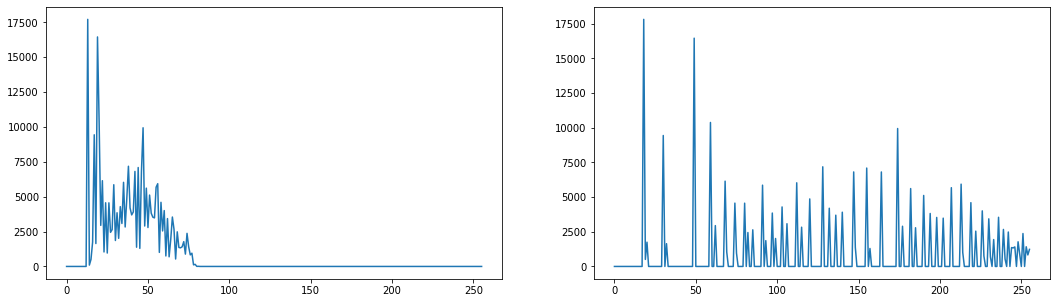

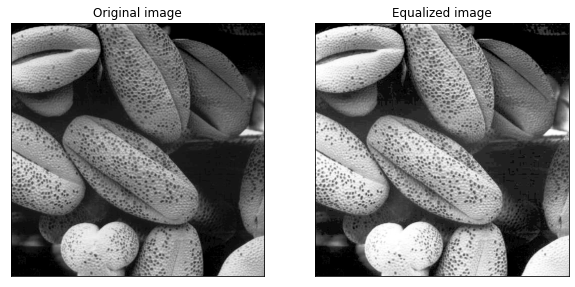

In [85]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert im is not None
hist_im = cv.calcHist([im], [0], None, [256], [0,256])

def hist_func(image,original_hist):
    M,N= image.shape
    cdf_im=np.cumsum(original_hist)
    g=cdf_im*255/(M*N)
    for i in range(0,len(g)):
        g[i]=int(round(g[i]))
    eq_im=cv.LUT(im,g).astype("uint8")
    hist_g =cv.calcHist([eq_im],[0],None,[256],[0,256])

    return hist_g,eq_im


fig, ax = plt.subplots(1,2,figsize= (18,5))

ax[0].plot(hist_im)
ax[1].plot(hist_func(im,hist_im)[0])

fig,ax = plt.subplots(1,2,figsize = (10,8))

ax[0].imshow(im,"gray")
ax[0].set_title("Original image")

ax[1].imshow(hist_func(im,hist_im)[1],"gray")
ax[1].set_title("Equalized image")
for i in range(2):
    ax [i] . set_xticks ([]) , ax [i] . set_yticks ([])
plt.show()


(270, 480)


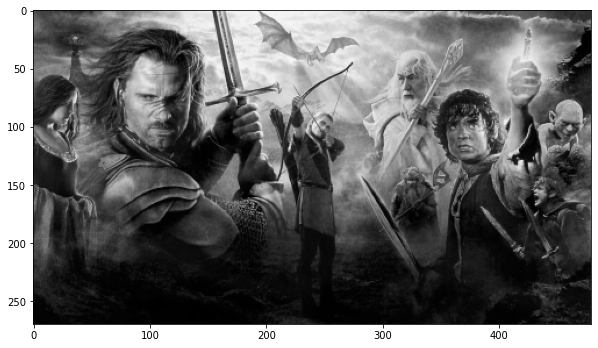

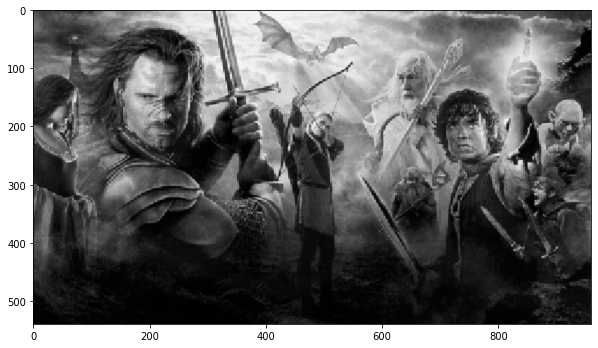

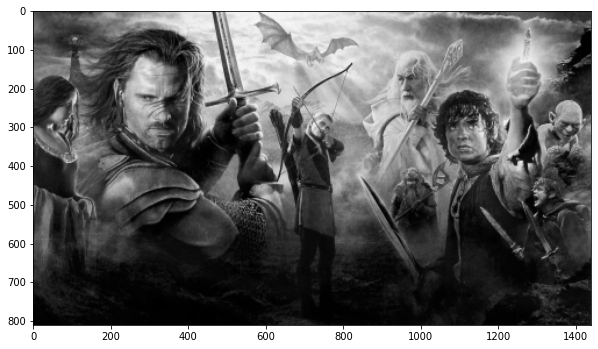

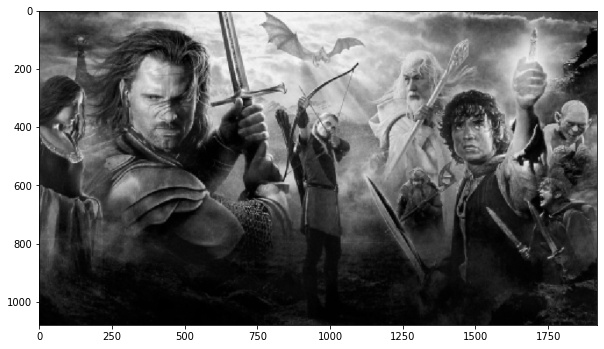

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
assert im is not None
print(im.shape)
fig,ax = plt.subplots(1,1,sharex="all",sharey="all",figsize=(10,10))
ax.imshow(im,cmap="gray",vmin=0,vmax=255)

for i in range(2,5):
    rows = int(i*im.shape[0])
    columns = int(i*im.shape[1])

    zoomed = np.zeros((rows,columns),dtype=im.dtype)
    
    for p in range(0,rows):
        for q in range(0,columns):
            try:
                m=round(p/i)
                n=round(q/i)
                if (m>=im.shape[0]):
                    m-=1
                if (n>=im.shape[1]):
                    n-=1
                zoomed[p,q]=im[m,n]
            except IndexError:
                print(int(p/i),int(q/i))
    
    fig,ax = plt.subplots(1,1,sharex="all",sharey="all",figsize=(10,10))
    ax.imshow(zoomed,cmap="gray",vmin=0,vmax=255)
    
plt.show()


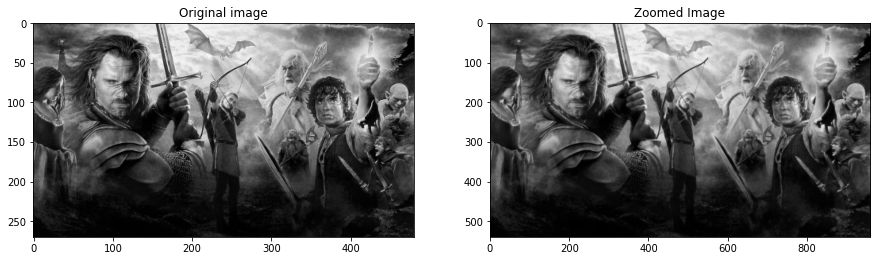

In [82]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
scale=2

def bilinear(im,scale):
    r=int(scale*im.shape[0])
    c=int(scale*im.shape[1])

    zoomed=np.zeros((r,c),dtype=im.dtype)
    width=im.shape[0]
    height=im.shape[1]
    for l in range(r):
        for m in range(c):
            
            l_ = l/scale
            m_ = m/scale
            
            l1 = min(int(np.floor(l_)), width-1)
            m1 = min(int(np.floor(m_)), height-1)
            l2 = min(int(np.ceil(l_)), width-1)
            m2 = min(int(np.ceil(m_)), height-1)
            
            Q11 = im[l1, m1]
            Q12 = im[l2, m1]
            Q21 = im[l1, m2]
            Q22 = im[l2, m2]
            
            P1 = (l2-l_)*Q11 + (l_-l1)*Q12
            P2 = (l2-l_)*Q21 + (l_-l1)*Q22
            
            if l1 == l2:
              P1 = Q11
              P2 = Q22
            
            P = (m2-m_)*P1 + (m_-m1)*P2
            if m1 == m2:
              P = P1
            zoomed[l,m]=int(P)
    return zoomed
zoomed=bilinear(im,scale)

fig,ax=plt.subplots(1,2,figsize=(15,11))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_GRAY2RGB))
ax[0].set_title('Original image')

ax[1].set_title('Zoomed Image')
ax[1].imshow(cv.cvtColor(zoomed,cv.COLOR_GRAY2RGB))


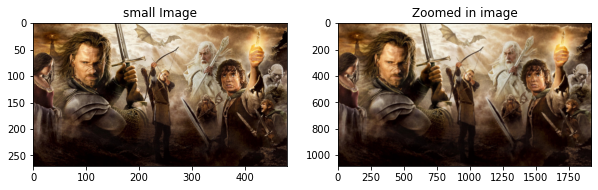

In [45]:
im=cv.imread(r'a1q5images/im01small.png',cv.IMREAD_COLOR)
assert im is not None

def BilinearZoom(image,scale):
   import math as m

   Rows=int(image.shape[0]*scale)
   columns=int(image.shape[1]*scale)
   zoomed=np.zeros((3,columns,Rows),dtype=image.dtype)
   for j in range(Rows):
    for i in range(columns):
        i_=i/scale
        j_=j/scale

        lu_cx,lu_cy=m.floor(i_),m.floor(j_)
        ru_cx,ru_cy=m.ceil(i_),m.floor(j_)
        lb_cx,lb_cy=m.floor(i_),m.ceil(j_)
        rb_cx,rb_cy=m.ceil(i_),m.ceil(j_)

        if ru_cx==image.shape[1]:
            ru_cx=lu_cx
        if rb_cx==image.shape[1]:
            rb_cx=lb_cx
        if rb_cy==image.shape[0]:
            rb_cy=ru_cy
        if lb_cy==image.shape[0]:
            lb_cy=ru_cy

        p1=image[lu_cy,lu_cx,:]
        p2=image[ru_cy,ru_cx,:]
        p3=image[rb_cy,rb_cx,:]
        p4=image[lb_cy,lb_cx,:]

        p11=p1*(ru_cx-i_)+p2*(i_-lu_cx)
        p12=p4*(ru_cx-i_)+p3*(i_-lu_cx)

        if ru_cx==lu_cx:
            p11=p1
            p12=p4

        p13=p11*(rb_cy-j_)+p12*(j_-ru_cy)
        if rb_cy==ru_cy:
            p13=p11
        zoomed[:,i,j]=p13
   return zoomed


new_img=BilinearZoom(im,4)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
axes[0].set_title("small Image")
axes[1].imshow(cv.cvtColor(new_img.T,cv.COLOR_BGR2RGB))
axes[1].set_title("Zoomed in image")
plt.show()
im_trns = new_img.T


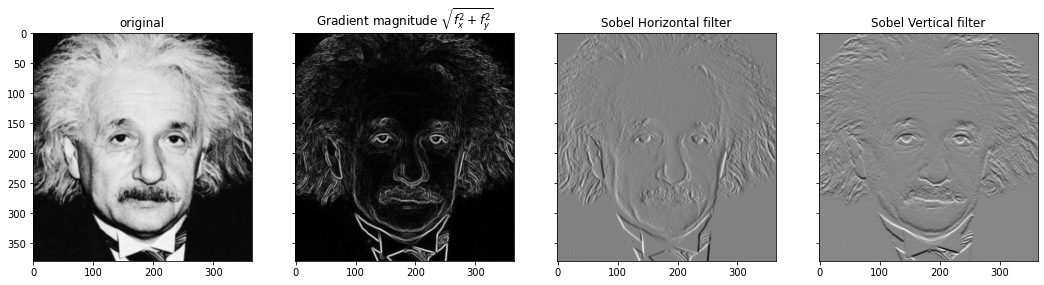

In [77]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

ver_kernel = np . array ([[-1,-2,-1 ],[0,0,0],[1,2,1]] , dtype=np.float32)
f_x=cv.filter2D(im,-1,ver_kernel)


hor_kernel = np . array ([[-1,0,1 ],[-2,0,2],[-1,0,1]] , dtype=np.float32)
f_y=cv.filter2D(im,-1,hor_kernel)

grad_mag=np.sqrt(f_x**2 + f_y**2)

fig,axes = plt.subplots(1,4,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray")
axes[0] . set_title( "original")

axes[1] . imshow( grad_mag , cmap= "gray")
axes[1] . set_title( "Gradient magnitude $ \sqrt{f_x^2 + f_y^2}$" )

axes[2].imshow(f_y, cmap="gray")
axes[2] . set_title( "Sobel Horizontal filter")

axes[3].imshow(f_x, cmap="gray")
axes[3] . set_title( "Sobel Vertical filter")

plt.show()
for i in range(4):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])

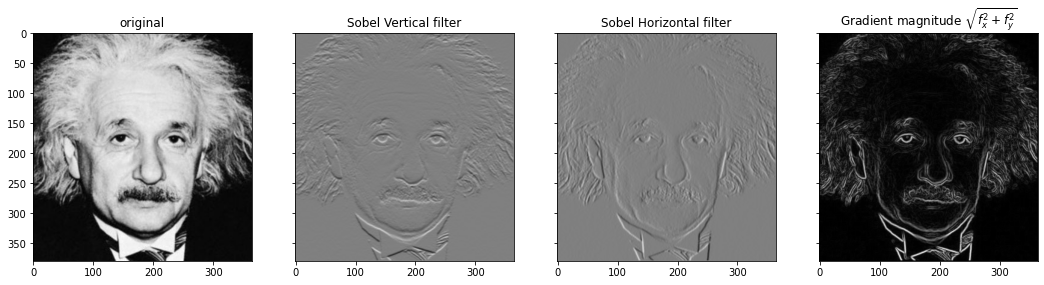

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

ver_kernel = np . array ([[-1,-2,-1 ],[0,0,0],[1,2,1]] , dtype=np.float32)
hor_kernel = np . array ([[-1,0,1 ],[-2,0,2],[-1,0,1]] , dtype=np.float32)

def convolute(image, kernel):
    result=np.zeros(image.shape,dtype=np.float32)
    for l in range(image.shape[0]):
        for m in range(image.shape[1]):
            total=0
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):   
                    if (((l+i)<image.shape[0]) & ((m+j)<image.shape[1])):
                        total+=kernel[i][j]*image[i+l][j+m]
            if((l<(image.shape[0]-2)) & (m<(image.shape[1]-2))):
                result[l+1][m+1] = total
    return result

result_ver = convolute(im, ver_kernel)
result_hor = convolute(im,hor_kernel)    
gradient_mag =np.sqrt(convolute(im, ver_kernel)**2 + convolute(im,hor_kernel)**2)


fig,axes = plt.subplots(1,4,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray")
axes[0] . set_title( "original")

axes[1] . imshow( result_ver , cmap= "gray",vmin=-1020,vmax=1020)
axes[1] . set_title( "Sobel Vertical filter" )

axes[2] . imshow( result_hor , cmap= "gray",vmin=-1020,vmax=1020)
axes[2] . set_title( "Sobel Horizontal filter" )

axes[3] . imshow( gradient_mag , cmap= "gray")
axes[3] . set_title( "Gradient magnitude $ \sqrt{f_x^2 + f_y^2}$" )
plt.show()
for i in range(4):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])

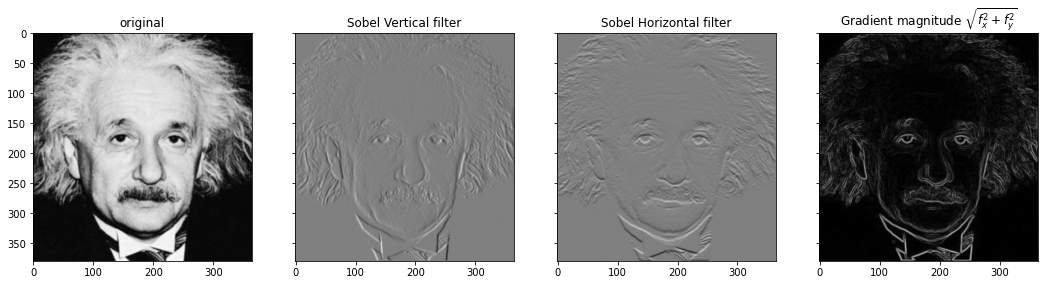

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None



def convolute(image, kernel):
    result=np.zeros(image.shape,dtype=np.float32)
    
    for l in range(image.shape[0]):
        for m in range(image.shape[1]):
            total=0
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):   
                    if (((l+i)<image.shape[0]) & ((m+j)<image.shape[1])):
                        total+=kernel[i][j]*image[i+l][j+m]
            if((l<(image.shape[0]-2)) & (m<(image.shape[1]-2))):
                result[l+1][m+1] = total
                
    return result

X = np.array([[1,2,1]])
Y = np.array([[-1],[0],[1]])
result_hor = convolute(convolute(im, X),Y)
result_ver = convolute(convolute(im, X.transpose()),Y.transpose())
gradient_mag =np.sqrt(result_hor**2+ result_ver**2)


fig,axes = plt.subplots(1,4,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray")
axes[0] . set_title( "original")

axes[1] . imshow( result_ver , cmap= "gray",vmin=-1020,vmax=1020)
axes[1] . set_title( "Sobel Vertical filter" )

axes[2] . imshow( result_hor , cmap= "gray",vmin=-1020,vmax=1020)
axes[2] . set_title( "Sobel Horizontal filter" )

axes[3] . imshow( gradient_mag , cmap= "gray")
axes[3] . set_title( "Gradient magnitude $ \sqrt{f_x^2 + f_y^2}$" )
plt.show()
for i in range(4):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])

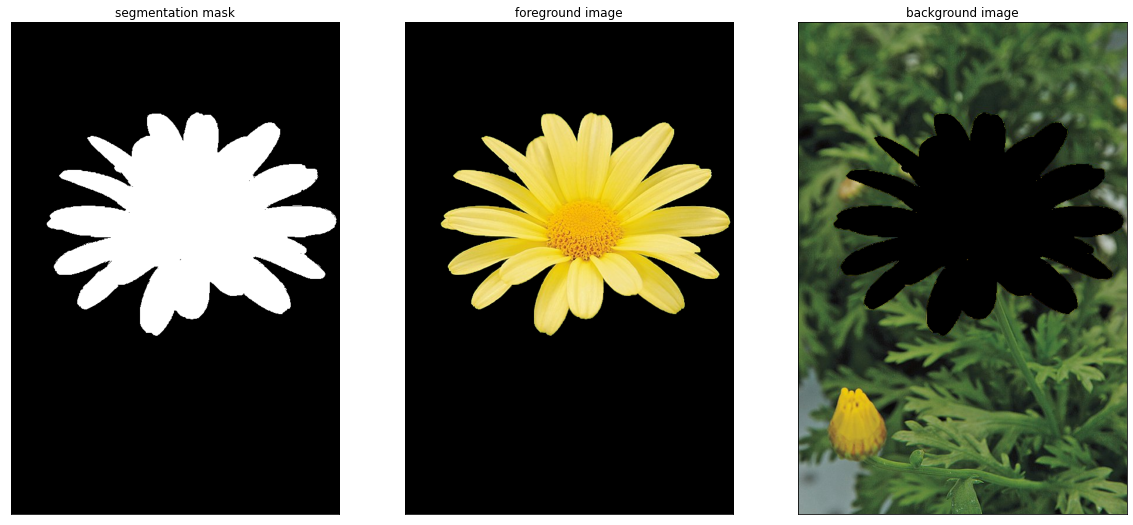

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = cv.imread(r'daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(im.shape[:2], np.uint8)

bg_mod = np.zeros((1, 65), np.float64)
fg_mod = np.zeros((1, 65), np.float64)

rectangle = (25,125,530,450)

(mask,bg_mod,fg_mod)=cv.grabCut(im, mask, rectangle,bg_mod, fg_mod,3, cv.GC_BGD)

outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1).astype('uint8')
outputMask = (outputMask * 255).astype("uint8")


output = cv.bitwise_and(im, im, mask=outputMask)
back_im=im-output

fig,axes=plt.subplots(1,3,figsize=(20,10))

axes[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
axes[0].set_title('segmentation mask')

axes[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
axes[1].set_title('foreground image')

axes[2].imshow(cv.cvtColor(back_im,cv.COLOR_BGR2RGB))
axes[2].set_title('background image')

for i in range(3):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt.show()

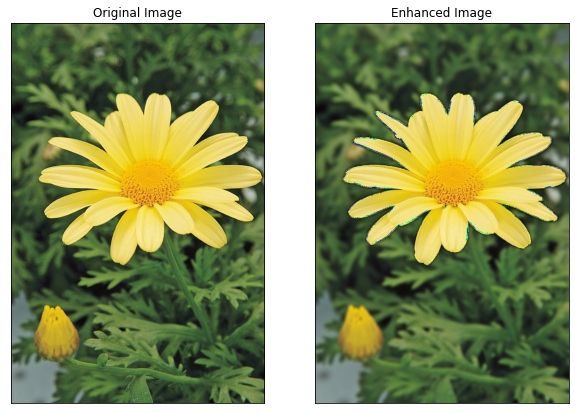

In [62]:

kernel_size=9
sigma=4

blurred_back=cv.GaussianBlur(back_im,(kernel_size,kernel_size),sigma)
enhanced_img=output+blurred_back

fig,axes=plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

axes[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
axes[1].set_title('Enhanced Image')

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt.show()